DATASET CREATION

In [15]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install glob
%pip install scikit-learn
%pip install tensorflow
%pip install prototypical-networks

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement prototypical-networks (from versions: none)
ERROR: No matching distribution found for prototypical-networks


In [5]:
import pandas as pd
import glob

csv_files = glob.glob(r"Datasets\Stress_Estimation_Datasets\*.csv")

# Check if any CSV files were found
if not csv_files:
    print("❌ No CSV files found in the directory!")
else:
    # Read and concatenate CSV files
    df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

    # Save the final dataset
    df.to_csv("BPM_Data_Final.csv", index=False)
    
    print("✅ All CSV files have been merged successfully!")
    print(f"ℹ️ The final dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

C:\Users\kisho\AppData\Local\Temp\ipykernel_22484\1336989801.py:11: DtypeWarning: Columns (1,2,3,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)


✅ All CSV files have been merged successfully!
ℹ️ The final dataset contains 362740 rows and 7 columns.


In [7]:
import pandas as pd

# Load the combined dataset
file_path = "BPM_Data_Final.csv"
df = pd.read_csv(file_path)

# Drop datetime columns if they exist
df.drop(columns=['datetime', 'Datetime'], errors='ignore', inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Display all unique values in the last column before classification
print("🔍 Unique values in the last column before classification:")
print(df['features'].unique())

# Define the stress mapping
stress_mapping = {
    "rest": "No Stress",
    "standing": "No Stress",
    "left fall while standing": "Stress",
    "right fall while standing": "Stress",
    "forward fall while standing": "Stress",
    "sitting": "No Stress",
    "left fall while sitting": "Stress",
    "right fall while sitting": "Stress",
    "forward fall while sitting": "Stress",
    "walking": "No Stress",
    "relax": "No Stress",
    "anxiety": "Stress",
    "sad": "Stress",
    "motivate": "No Stress",
    "stress ball": "Stress",
    "hand at rest": "No Stress",
    "fist": "Stress",
    "funny": "No Stress",
    "walking ": "No Stress"
}

df['features'] = df['features'].astype(str).str.lower().str.strip().map(stress_mapping).fillna("Unknown")

df = df.sort_values(by=['sys', 'dia', 'hr', 'spo2', 'features'])
df = df.drop_duplicates(subset=['sys', 'dia', 'hr', 'spo2'], keep='first')

print("\n✅ Unique values after classification:")
print(df['features'].unique())

updated_file_path = "updated_BPM_data.csv"
df.to_csv(updated_file_path, index=False)

print(f"\n✅ Updated dataset saved as: {updated_file_path}")


C:\Users\kisho\AppData\Local\Temp\ipykernel_22484\824672458.py:5: DtypeWarning: Columns (1,2,3,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


🔍 Unique values in the last column before classification:
['Standing' 'Rest' 'Left Fall while Standing' 'Right Fall while Standing'
 'Forward Fall while Standing' 'Sitting' 'Left Fall while Sitting'
 'Right Fall while Sitting' 'Forward Fall while Sitting' 'Walking' 'Relax'
 'Anxiety' 'Sad' 'Motivate' 'Funny' 'Stress Ball' 'Hand at Rest' 'Fist'
 'Funny ' nan 'Walking ']

✅ Unique values after classification:
['No Stress' 'Stress' 'Unknown']

✅ Updated dataset saved as: updated_BPM_data.csv


### Random Seed

Random Seed Setup

In [8]:
import random
import numpy as np
import torch

# Set random seeds for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)  # If using multiple GPUs

# Ensure deterministic behavior in PyTorch
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


Random Seed in Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=SEED, stratify=y)


NameError: name 'X_scaled' is not defined

## Random Forest Algorithm(Existing)

Random Seed for Random Forest

In [13]:
# Import required libraries
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.spatial.distance import euclidean

# Load the dataset
file_path = "updated_BPM_data.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# Drop unnecessary columns (datetime if present)
df.drop(columns=['datetime', 'Datetime'], errors='ignore', inplace=True)

# Convert numeric columns to proper types
df[['sys', 'dia', 'hr', 'spo2']] = df[['sys', 'dia', 'hr', 'spo2']].apply(pd.to_numeric, errors='coerce')

# Drop missing values
df.dropna(inplace=True)

# Convert categorical target variable ('features') into binary labels (0 = No Stress, 1 = Stress)
df['features'] = df['features'].map({'No Stress': 0, 'Stress': 1})
df.dropna(subset=['features'], inplace=True)

# Split features and labels
X = df[['sys', 'dia', 'hr', 'spo2']]
y = df['features']

# Normalize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"✅ Random Forest Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_rep)

# Save the trained model
model_path = "stress_random_forest_model.pkl"
joblib.dump(rf_model, model_path)
print(f"\n✅ Model saved as: {model_path}")

# Few-Shot Learning Component

# Dynamically store reference samples (Prototypical Learning)
stress_samples = X_train[y_train == 1]
no_stress_samples = X_train[y_train == 0]

# Compute prototypical centers (average representations)
proto_stress = np.mean(stress_samples, axis=0)  # Center for stress samples
proto_no_stress = np.mean(no_stress_samples, axis=0)  # Center for no-stress samples

# Function to predict stress using Few-Shot Learning principles
def predict_stress_rf_few_shot(sys, dia, hr, spo2):
    new_data = np.array([[sys, dia, hr, spo2]])
    new_data_scaled = scaler.transform(new_data).flatten()  # Convert to 1D

    # Get Random Forest Prediction
    rf_prediction = rf_model.predict([new_data_scaled])[0]  # Ensure input is 2D

    # Compute similarity to prototype centers
    stress_distance = euclidean(new_data_scaled, proto_stress)
    no_stress_distance = euclidean(new_data_scaled, proto_no_stress)

    # If RF is unsure, adjust prediction using similarity
    if rf_prediction == 0 and stress_distance < no_stress_distance:
        return "🚨 Stress Detected! (Few-Shot Adjusted)"
    elif rf_prediction == 1 and no_stress_distance < stress_distance:
        return "✅ No Stress. (Few-Shot Adjusted)"

    return "🚨 Stress Detected!" if rf_prediction == 1 else "✅ No Stress."

# Example test case (replace with real-time data)
hardware_sys = 120  # Example SYS value
hardware_dia = 80   # Example DIA value
hardware_hr = 90    # Example HR value
hardware_spo2 = 86  # Example SpO₂ value

# Make prediction
print(f"SYS: {hardware_sys}, DIA: {hardware_dia}, HR: {hardware_hr}, SpO₂: {hardware_spo2}")
print(predict_stress_rf_few_shot(hardware_sys, hardware_dia, hardware_hr, hardware_spo2))


✅ Random Forest Model Accuracy: 96.05%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      3456
         1.0       0.96      0.94      0.95      2141

    accuracy                           0.96      5597
   macro avg       0.96      0.96      0.96      5597
weighted avg       0.96      0.96      0.96      5597


✅ Model saved as: stress_random_forest_model.pkl
SYS: 120, DIA: 80, HR: 90, SpO₂: 86
🚨 Stress Detected!


d:\Chatbot\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### FSL Implementation

Random Seed for FSL

In [16]:
from prototypical_networks import ProtoNet 

torch.manual_seed(SEED)
protonet = ProtoNet().to(device)


ModuleNotFoundError: No module named 'prototypical_networks'

In [ ]:
# Install PyTorch (if not installed in Colab)
%pip install torch torchvision -q


In [ ]:
!python -m pip install setfit

## FewShot Learning for Stress Estimation

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from datasets import Dataset
from setfit import SetFitModel, Trainer
from sentence_transformers import SentenceTransformer

# Load and preprocess dataset
file_path = "/content/updated_BPM_data.csv"
df = pd.read_csv(file_path)
df[['sys', 'dia', 'hr', 'spo2']] = df[['sys', 'dia', 'hr', 'spo2']].apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)
df = df[df['features'].isin(['No Stress', 'Stress'])]
df['features'] = df['features'].map({'No Stress': 0, 'Stress': 1})

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['sys', 'dia', 'hr', 'spo2']])
y = df['features'].values

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42, stratify=y)

# Convert to SetFit-compatible dataset
train_texts = [f"sys: {x[0]}, dia: {x[1]}, hr: {x[2]}, spo2: {x[3]}" for x in X_train]
test_texts = [f"sys: {x[0]}, dia: {x[1]}, hr: {x[2]}, spo2: {x[3]}" for x in X_test]
train_dataset = Dataset.from_dict({"text": train_texts, "label": y_train.tolist()})
test_dataset = Dataset.from_dict({"text": test_texts, "label": y_test.tolist()})

# Load a local SetFit model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")  # No Hugging Face Hub needed
model = SetFitModel(embedding_model)

# Define Improved Few-Shot Prototypical Network Classifier
class ProtoNet(nn.Module):
    def __init__(self, feature_dim=1024):
        super(ProtoNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(4, 4096),
            nn.ReLU(),
            nn.BatchNorm1d(4096, track_running_stats=False),
            nn.Dropout(0.3),
            nn.Linear(4096, 2048),
            nn.ReLU(),
            nn.BatchNorm1d(2048, track_running_stats=False),
            nn.Dropout(0.3),
            nn.Linear(2048, feature_dim),  # Ensure this is the final embedding size
            nn.ReLU(),
            nn.BatchNorm1d(feature_dim, track_running_stats=False)
        )

    def forward(self, x):
        if self.training or x.shape[0] > 1:  # Normal forward for batches
            return self.encoder(x)
        else:
            # Handle single sample inference correctly (skip BatchNorm issues)
            for layer in self.encoder:
                if isinstance(layer, nn.BatchNorm1d):
                    continue  # Skip BatchNorm for single input
                x = layer(x)
            return x  # Return correctly shaped embedding


def euclidean_distance(a, b):
    return torch.cdist(a, b, p=2)

class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=0.25):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        p_t = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - p_t) ** self.gamma * ce_loss
        return focal_loss.mean()

# Initialize and Train ProtoNet
device = "cuda" if torch.cuda.is_available() else "cpu"
protonet = ProtoNet().to(device)
optimizer = optim.AdamW(protonet.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)
loss_function = FocalLoss()

early_stopping_patience = 10
best_val_acc = 0
patience_counter = 0

batch_size = 64
train_loader = DataLoader(TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long)), batch_size=batch_size, shuffle=False)

for epoch in range(300):  # More epochs for better convergence
    protonet.train()
    epoch_loss = 0.0
    correct, total = 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        embeddings = protonet(inputs)
        class_prototypes = torch.stack([embeddings[labels == i].mean(0) for i in torch.unique(labels) if (labels == i).sum() > 0])
        dists = euclidean_distance(embeddings, class_prototypes)
        loss = loss_function(-dists, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(protonet.parameters(), max_norm=1.0)
        optimizer.step()
        epoch_loss += loss.item()
        preds = torch.argmin(dists, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    train_acc = correct / total
    scheduler.step(epoch_loss)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss/len(train_loader):.4f}, Train Accuracy: {train_acc*100:.2f}%")

    # Early stopping check
    if train_acc > best_val_acc:
        best_val_acc = train_acc
        patience_counter = 0
    else:
        patience_counter += 1
    if patience_counter >= early_stopping_patience:
        print("Early stopping triggered.")
        break

# Evaluate the ProtoNet model
def evaluate_protonet(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            embeddings = model(inputs)
            class_prototypes = torch.stack([embeddings[labels == i].mean(0) for i in torch.unique(labels) if (labels == i).sum() > 0])
            dists = euclidean_distance(embeddings, class_prototypes)
            preds = torch.argmin(dists, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    acc = correct / total
    print(f"Final Test Accuracy: {acc * 100:.2f}%")
    return acc

evaluate_protonet(protonet, test_loader)

Epoch 1, Loss: 0.1045, Train Accuracy: 68.97%
Epoch 2, Loss: 0.0608, Train Accuracy: 73.92%
Epoch 3, Loss: 0.0317, Train Accuracy: 81.85%
Epoch 4, Loss: 0.0196, Train Accuracy: 87.80%
Epoch 5, Loss: 0.0227, Train Accuracy: 85.10%
Epoch 6, Loss: 0.0231, Train Accuracy: 84.69%
Epoch 7, Loss: 0.0235, Train Accuracy: 85.11%
Epoch 8, Loss: 0.0235, Train Accuracy: 85.28%
Epoch 9, Loss: 0.0232, Train Accuracy: 86.68%
Epoch 10, Loss: 0.0230, Train Accuracy: 86.51%
Epoch 11, Loss: 0.0221, Train Accuracy: 88.02%
Epoch 12, Loss: 0.0206, Train Accuracy: 89.05%
Epoch 13, Loss: 0.0196, Train Accuracy: 90.65%
Epoch 14, Loss: 0.0189, Train Accuracy: 91.45%
Epoch 15, Loss: 0.0183, Train Accuracy: 92.24%
Epoch 16, Loss: 0.0182, Train Accuracy: 92.03%
Epoch 17, Loss: 0.0175, Train Accuracy: 92.10%
Epoch 18, Loss: 0.0172, Train Accuracy: 92.74%
Epoch 19, Loss: 0.0171, Train Accuracy: 93.12%
Epoch 20, Loss: 0.0168, Train Accuracy: 93.12%
Epoch 21, Loss: 0.0165, Train Accuracy: 93.30%
Epoch 22, Loss: 0.0161

0.9764903442485307

In [ ]:
# Save the model state dictionary locally
model_save_path = "protonet_model.pt"
torch.save({
    'model_state_dict': protonet.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scaler': scaler  # if you want to save the scaler too
}, model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to protonet_model.pt


Compute Predictions on Test Data

In [ ]:
import torch

# Set model to evaluation mode
protonet.eval()

# Store true labels & predictions
all_preds = []
all_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Get embeddings
        embeddings = protonet(inputs)

        # Compute class prototypes
        class_prototypes = torch.stack([
            embeddings[labels == i].mean(0) for i in torch.unique(labels)
        ])

        # Compute Euclidean distances
        dists = euclidean_distance(embeddings, class_prototypes)

        # Predict class based on closest prototype
        preds = torch.argmin(dists, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_true.extend(labels.cpu().numpy())

# Convert lists to numpy arrays
all_preds = np.array(all_preds)
all_true = np.array(all_true)


In [ ]:
from sklearn.metrics import accuracy_score

# Compute accuracy
accuracy = accuracy_score(all_true, all_preds)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 97.65%


CONFUSION MATRIX

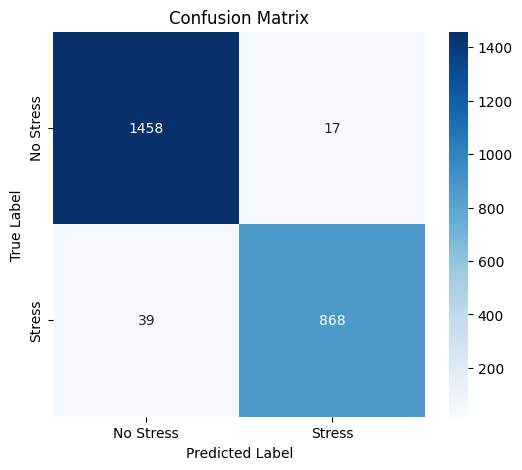

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(all_true, all_preds)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stress", "Stress"], yticklabels=["No Stress", "Stress"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Precision, Recall, and F1-score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute Precision, Recall, and F1-score
precision = precision_score(all_true, all_preds)
recall = recall_score(all_true, all_preds)
f1 = f1_score(all_true, all_preds)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.98
Recall: 0.96
F1 Score: 0.97


ROC Curve

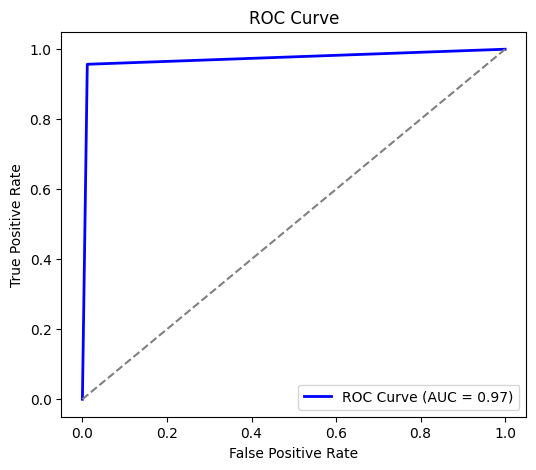

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(all_true, all_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


Precision-Recall Curve

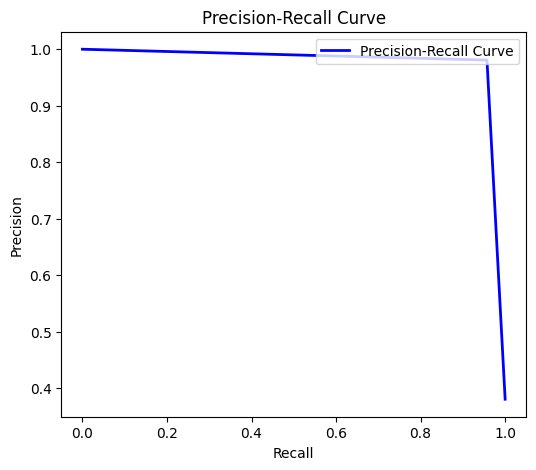

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precisions, recalls, _ = precision_recall_curve(all_true, all_preds)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, color='blue', lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()


In [ ]:
import torch
import numpy as np
import pandas as pd

# Define your test input (example values)
input_data = np.array([[140, 83, 122, 95]])  # Example: sys=112, dia=75, hr=65, spo2=98

# Convert input to DataFrame to avoid StandardScaler warnings
input_df = pd.DataFrame(input_data, columns=['sys', 'dia', 'hr', 'spo2'])

# Apply the same StandardScaler used in training
input_data_scaled = scaler.transform(input_df)

# Convert to PyTorch tensor
input_tensor = torch.tensor(input_data_scaled, dtype=torch.float32).to(device)

# Set model to evaluation mode
protonet.eval()

# Disable BatchNorm tracking during inference
for module in protonet.modules():
    if isinstance(module, torch.nn.BatchNorm1d):
        module.track_running_stats = False
        module.momentum = None

with torch.no_grad():
    # Pass input through ProtoNet
    input_embedding = protonet(input_tensor)

    # Compute class prototypes from training data
    all_embeddings = []
    all_labels = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        embeddings = protonet(inputs)
        all_embeddings.append(embeddings)
        all_labels.append(labels)

    all_embeddings = torch.cat(all_embeddings)
    all_labels = torch.cat(all_labels)

    # Ensure embeddings have the correct dimension
    feature_dim = input_embedding.shape[1]  # Get embedding size dynamically
    class_prototypes = torch.stack([all_embeddings[all_labels == i].mean(0) for i in torch.unique(all_labels)])

    # **Fix dimensionality mismatch**
    if class_prototypes.shape[1] != feature_dim:
        class_prototypes = class_prototypes[:, :feature_dim]  # Ensure same feature dimension

    # Compute distances to class prototypes
    dists = euclidean_distance(input_embedding, class_prototypes)

    # Get prediction (class with minimum distance)
    pred_class = torch.argmin(dists, dim=1).item()

    # Map prediction back to class labels
    stress_label = "Stress" if pred_class == 1 else "No Stress"

print(f"Predicted Stress Level: {stress_label}")


Predicted Stress Level: No Stress


In [ ]:
import torch
import numpy as np
import pandas as pd

# Define your test input (example values)
input_data = np.array([[131, 83, 70, 96]])  # Example: sys=112, dia=75, hr=65, spo2=98
 # Example: sys=120, dia=80, hr=75, spo2=98

# Convert input to DataFrame to avoid StandardScaler warnings
input_df = pd.DataFrame(input_data, columns=['sys', 'dia', 'hr', 'spo2'])

# Apply the same StandardScaler used in training
input_data_scaled = scaler.transform(input_df)

# Convert to PyTorch tensor
input_tensor = torch.tensor(input_data_scaled, dtype=torch.float32).to(device)

# Set model to evaluation mode
protonet.eval()

# Disable BatchNorm tracking during inference
for module in protonet.modules():
    if isinstance(module, torch.nn.BatchNorm1d):
        module.track_running_stats = False
        module.momentum = None

with torch.no_grad():
    # Pass input through ProtoNet
    input_embedding = protonet(input_tensor)

    # Compute class prototypes from training data
    all_embeddings = []
    all_labels = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        embeddings = protonet(inputs)
        all_embeddings.append(embeddings)
        all_labels.append(labels)

    all_embeddings = torch.cat(all_embeddings)
    all_labels = torch.cat(all_labels)

    # Ensure embeddings have the correct dimension
    feature_dim = input_embedding.shape[1]  # Get embedding size dynamically
    class_prototypes = torch.stack([all_embeddings[all_labels == i].mean(0) for i in torch.unique(all_labels)])

    # **Fix dimensionality mismatch**
    if class_prototypes.shape[1] != feature_dim:
        class_prototypes = class_prototypes[:, :feature_dim]  # Ensure same feature dimension

    # Compute distances to class prototypes
    dists = euclidean_distance(input_embedding, class_prototypes)

    # Get prediction (class with minimum distance)
    pred_class = torch.argmin(dists, dim=1).item()

    # Map prediction back to class labels
    stress_label = "Stress" if pred_class == 1 else "No Stress"

print(f"Predicted Stress Level: {stress_label}")


Predicted Stress Level: No Stress
